In [14]:
##### setting
### set filename you want to analysis
import os
filepath = None
gpifile = None

if filepath is None:
    import os
    import smooziee
    filepath = os.path.join(os.path.dirname(os.path.dirname(smooziee.__file__)), 'data', 'PbTe_sq_GL711_p0p55_RT_1')
    gpifile = os.path.join(os.path.dirname(os.path.dirname(smooziee.__file__)), 'data', 'gpi.PbTe_sq_GL711_p0p55_RT')
    
filename = os.path.basename(filepath)

In [15]:
### qpoint of this data
from smooziee import gpi
tf_num = int(filepath[-1])
gpi_read = gpi.GPI_reader(gpifile)
qpoint = gpi_read.qpoint(tf_num=tf_num)
print(qpoint)

[6.95, 1.05, 1.05]


In [16]:
##### import
from smooziee import peak_search as pksearch
import imp
imp.reload(pksearch)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lmfit

In [17]:
##### read data from filename
data_df = pd.read_csv(filepath, sep='\s+')
x_arr = np.array(data_df.meV)
y_arr = np.array(data_df.y_unitpk)

In [18]:
##### make object
processor = pksearch.PeakSearch(x_arr, y_arr, name=filename, qpoint=qpoint)

found 4 peaks
[11, 20, 28, 65]


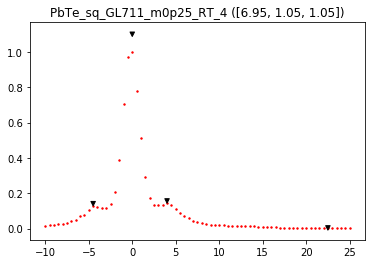

In [19]:
##### find peak automatically
processor.find_peak(order=3)


### make figure
fig = plt.figure()
ax = fig.add_subplot(111)
processor.plot(ax)
print(processor.ix_peaks)

add mode
test


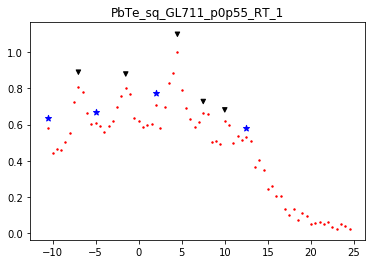

In [22]:
##### add peak by hand ~test~
processor.revise_peak(idx=[0,11,25,46], run_mode='test')

add mode
set new ix_peaks to self.ix_peaks
[0, 7, 11, 18, 25, 30, 36, 41, 46]


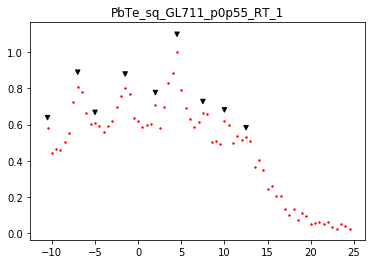

In [23]:
##### add peak by hand ~run~
processor.revise_peak(idx=[0,11,25,46], run_mode='run')

### make figure
fig = plt.figure()
ax = fig.add_subplot(111)
processor.plot(ax)
print(processor.ix_peaks)

found 4 pair
[[0, 41], [7, 36], [11, 30], [18, 25]]


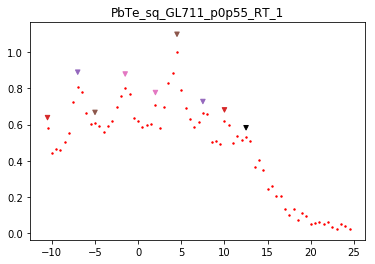

In [24]:
##### find peak pair automatically
processor.find_peak_pair(threshold=1)
print(processor.ix_peakpairs)

### make figure
fig = plt.figure()
ax = fig.add_subplot(111)
processor.plot(ax)

current peak_idx_lst
[0, 7, 11, 18, 25, 30, 36, 41, 46]

initial peak_pair_idx_lst
[[0, 41], [7, 36], [11, 30], [18, 25]]


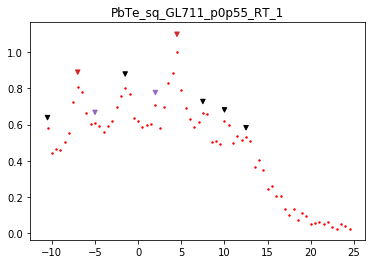

In [25]:
##### find peak pair by hand ~test~
print("current peak_idx_lst")
print(processor.ix_peaks)
print("")
print("initial peak_pair_idx_lst")
print(processor.ix_peakpairs)

### test
processor.revise_peak_pair([[7,30], [11,25]], run_mode='test')

current peak_idx_lst
[0, 7, 11, 18, 25, 30, 36, 41, 46]

initial peakpair_idx_lst
[[0, 41], [7, 36], [11, 30], [18, 25]]

revised peakpair_idx_lst
[[7, 30], [11, 25]]


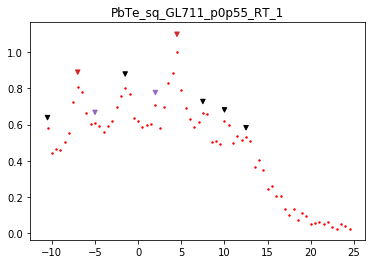

In [26]:
##### find peak pair by hand ~run~
print("current peak_idx_lst")
print(processor.ix_peaks)
print("")
print("initial peakpair_idx_lst")
print(processor.ix_peakpairs)

### revise
processor.revise_peak_pair([[7,30], [11,25]], run_mode='run')

print("")
print("revised peakpair_idx_lst")
print(processor.ix_peakpairs)

### make figure
fig = plt.figure()
ax = fig.add_subplot(111)
processor.plot(ax)

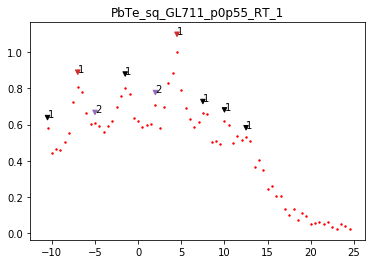

In [31]:
### set degenerate
ixs = [ 1 for _ in range(len(processor.ix_peaks))]
ixs[2] = 2
ixs[4] = 2
processor.set_degenerate(ixs)

fig = plt.figure()
ax = fig.add_subplot(111)
processor.plot(ax)

In [32]:
### save
# savename = 'peak_search.pkl'
savename = None
if savename is None:
    savename = os.path.join(os.path.dirname(os.path.dirname(smooziee.__file__)), 'data', 'peak_search.pkl')
processor.save(savename)